# 准备环境

In [29]:
# 安装MMYOLO
# !git clone https://github.com/open-mmlab/mmyolo.git

In [2]:
import os
os.chdir('mmyolo')

In [3]:
# !pip install -r requirements/albu.txt

Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple
  Using cached https://repo.huaweicloud.com/repository/pypi/packages/3f/45/21fc904365f9cea3559e0192349bfe3ea2dce52672c1d9127c3b59711804/opencv_python_headless-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.2 MB)


In [4]:
# !mim install -v -e .

Using pip 21.1.3 from /root/miniconda3/lib/python3.8/site-packages/pip (python 3.8)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-ephem-wheel-cache-z2w1_ldf
Created temporary directory: /tmp/pip-req-tracker-5f8rkz01
Initialized build tracking at /tmp/pip-req-tracker-5f8rkz01
Created build tracker: /tmp/pip-req-tracker-5f8rkz01
Entered build tracker: /tmp/pip-req-tracker-5f8rkz01
Created temporary directory: /tmp/pip-install-_mculqxz
Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
Obtaining file:///root/workspace/01MMPose/mmyolo
  Added file:///root/workspace/01MMPose/mmyolo to build tracker '/tmp/pip-req-tracker-5f8rkz01'
    Running setup.py (path:/root/workspace/01MMPose/mmyolo/setup.py) egg_info for package from file:///root/workspace/01MMPose/mmyolo
    Created temporary directory: /tmp/pip-pip-egg-info-kzlqyev0
    Running command 

In [5]:
# 检查 mmpose
import mmyolo
print('mmyolo版本', mmyolo.__version__)

mmyolo版本 0.5.0


In [10]:
# 裁剪图片
import cv2

img = cv2.imread('../mmdetection/data/test_balloon/balloon.jpg')
h,w=img.shape[:2]
resized_img = cv2.resize(img, (640, 640))
cv2.imwrite('resized_image.jpg', resized_img)

True

# 可视化

In [20]:
# 可视化 backbone 输出的 3 个通道
!python demo/featmap_vis_demo.py \
      resized_image.jpg \
      ../mmdetection/data/rtmdet_tiny_1xb12-40e_balloon.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth  \
      --target-layers backbone  \
      --channel-reduction squeeze_mean

resized_image.jpg
../mmdetection/data/rtmdet_tiny_1xb12-40e_balloon.py
../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth
06/11 20:06:02 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/11 20:06:02 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/11 20:06:06 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything importan

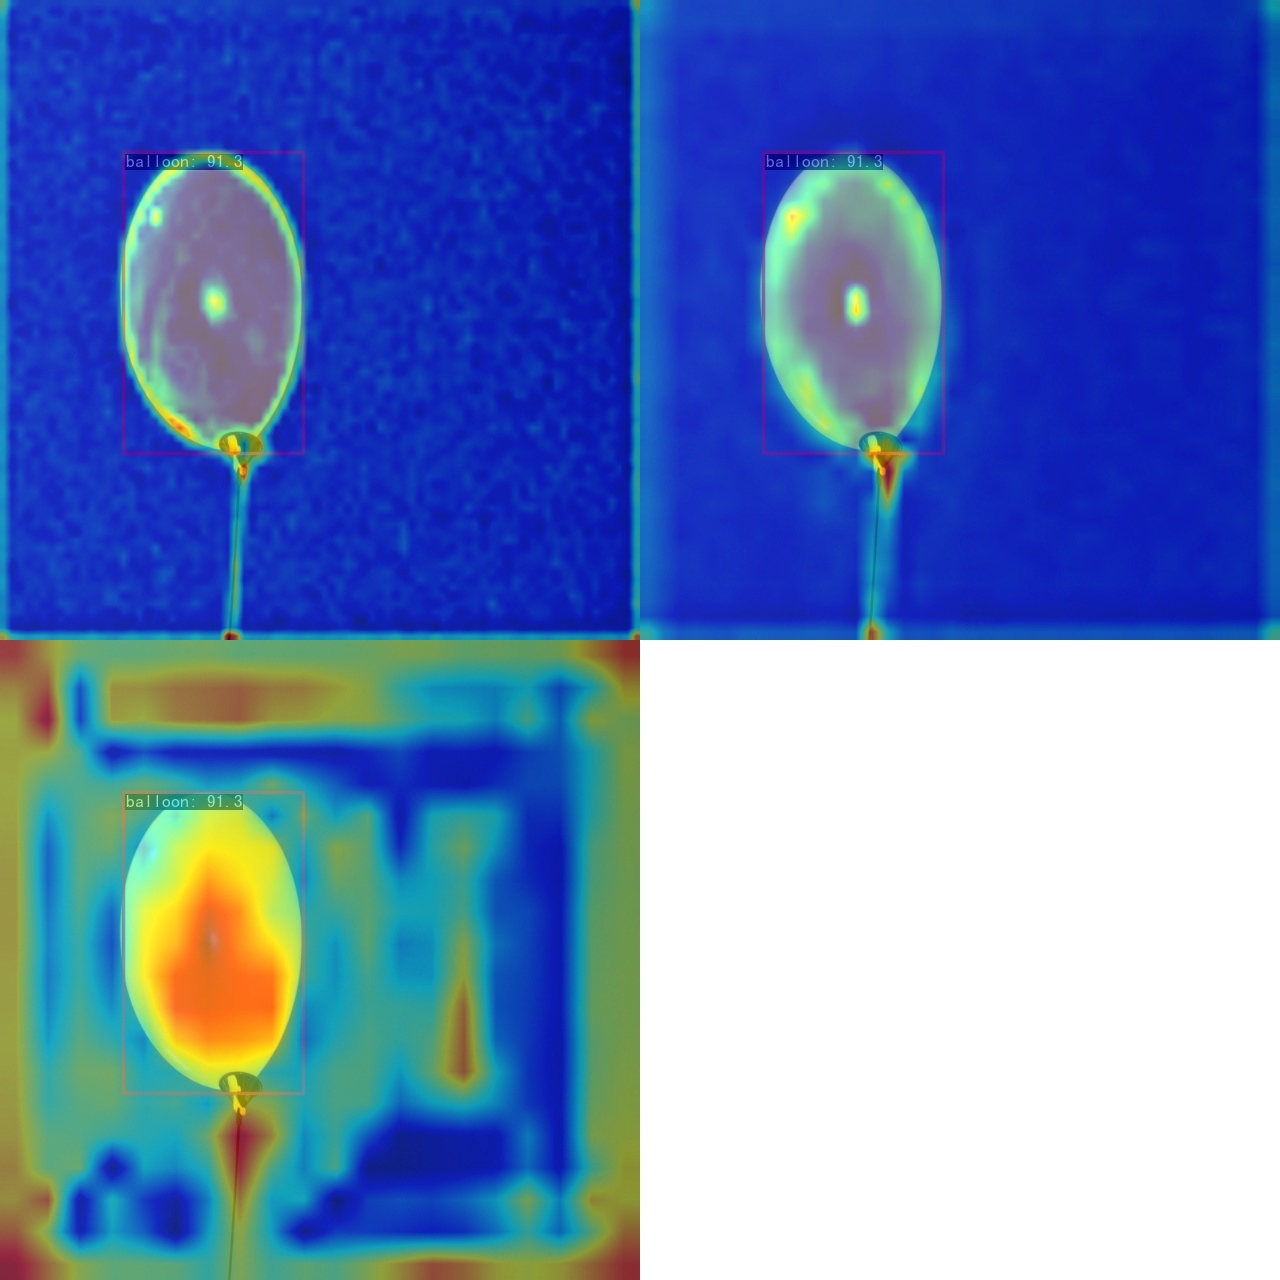

In [21]:
from PIL import Image
Image.open('output/resized_image.jpg')     

resized_image.jpg
../mmdetection/data/rtmdet_tiny_1xb12-40e_balloon.py
../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth
06/11 20:07:36 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/11 20:07:36 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/11 20:07:40 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything importan

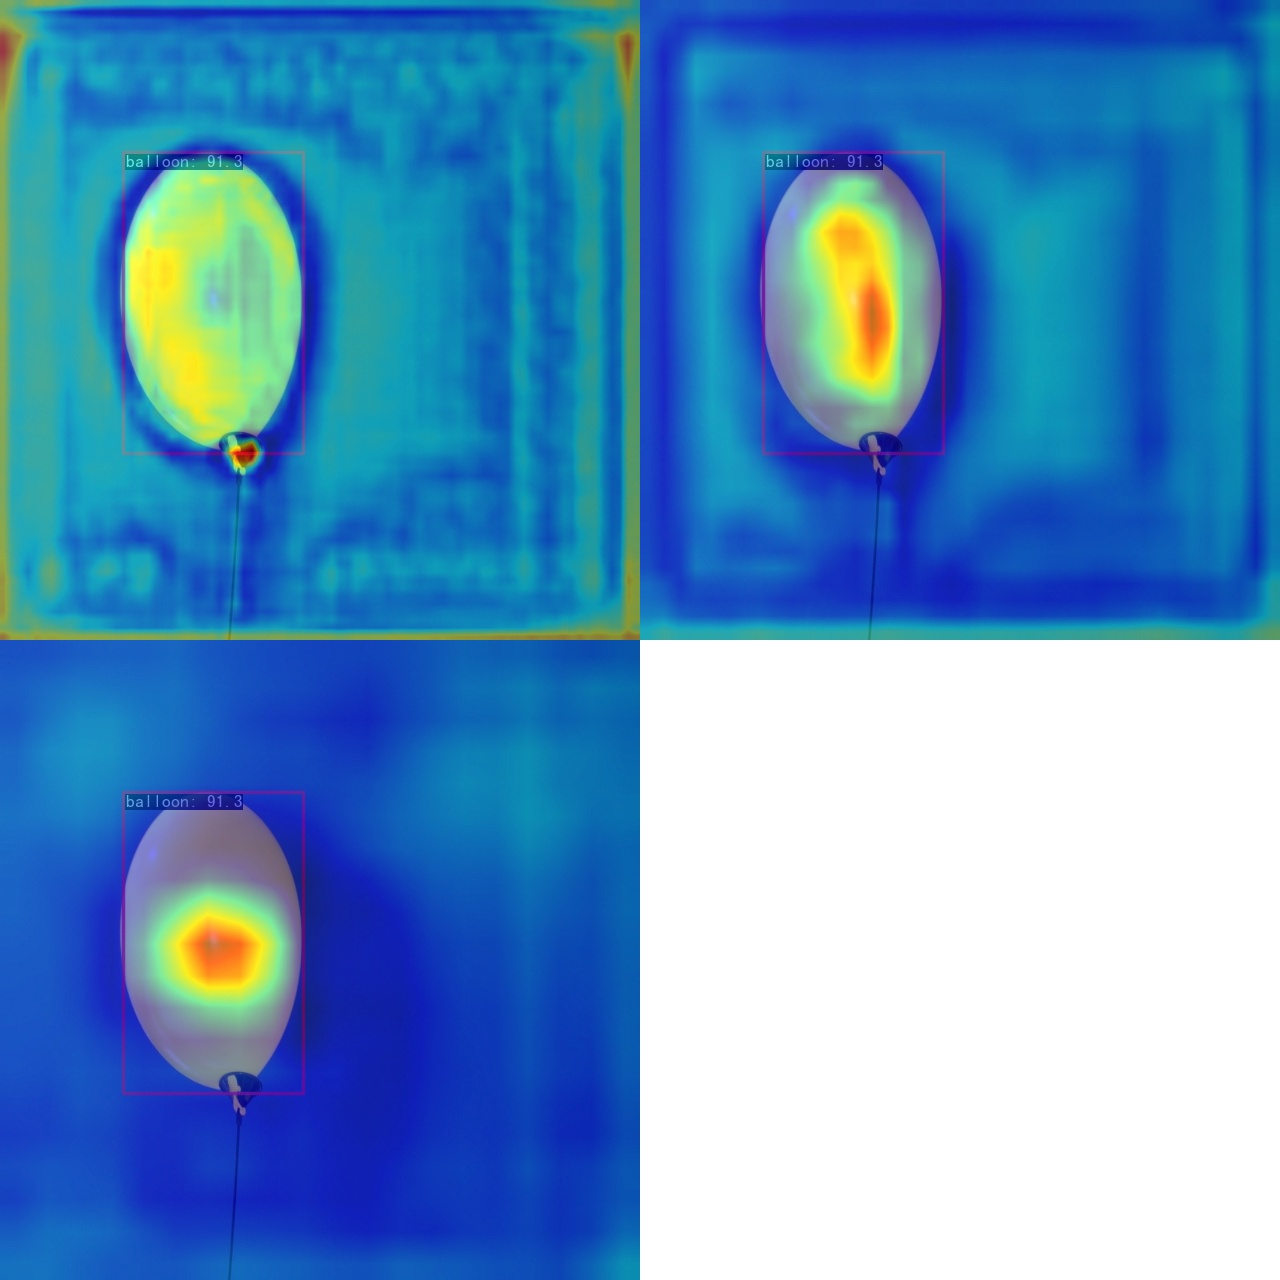

In [22]:
# 可视化 neck 输出的 3 个通道
!python demo/featmap_vis_demo.py \
      resized_image.jpg \
      ../mmdetection/data/rtmdet_tiny_1xb12-40e_balloon.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth  \
      --target-layers neck  \
      --channel-reduction squeeze_mean
Image.open('output/resized_image.jpg') 

In [23]:
# 安装grad-cam
!pip install "grad-cam"

Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 7.8 MB 2.2 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.3-py3-none-any.whl size=32243 sha256=cead988efe202156d1ab0db92aaf15d2c3fd5e09d521d6a16c7764dffdff8343
  Stored in directory: /root/.cache/pip/wheels/27/c4/a3/f620eedbf878bee53a7d4c2d543625bf3707c4e1a1446dfdb8
Successfully built grad-cam


The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

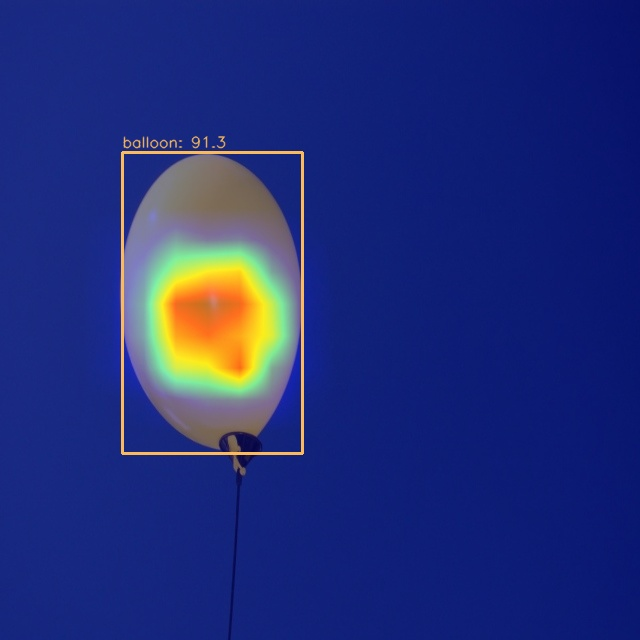

In [27]:
# 查看 neck 输出的最小输出特征图的 Grad CAM
!python demo/boxam_vis_demo.py \
      resized_image.jpg \
      ../mmdetection/data/rtmdet_tiny_1xb12-40e_balloon.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth  \
      --target-layer neck.out_convs[2]
Image.open('output/resized_image.jpg')     


The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

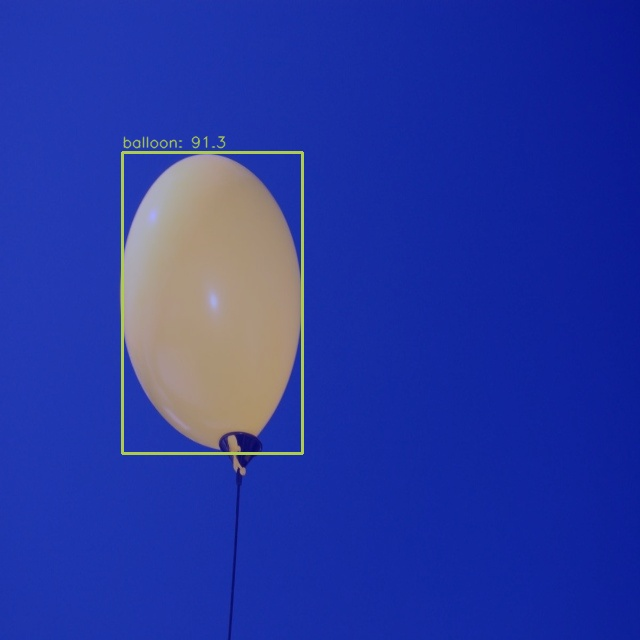

In [28]:
# 查看 neck 输出的最大输出特征图的 Grad CAM
!python demo/boxam_vis_demo.py \
      resized_image.jpg \
      ../mmdetection/data/rtmdet_tiny_1xb12-40e_balloon.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth  \
      --target-layer neck.out_convs[0]
Image.open('output/resized_image.jpg')   